# Example: Minimization Tool in PyRayHF
In this example, we start with a given background ionospheric model. 
We modify this background to create synthetic data and then use a minimization 
technique to adjust the background so that it matches the synthetic data.

In [1]:
#!/usr/bin/env python
# --------------------------------------------------------
# Distribution Statement A. Approved for public release.
# Distribution is unlimited.
# This work was supported by the Office of Naval Research.
# --------------------------------------------------------
"""Example of a minimization tool in PyRayHF.
"""

import pickle
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

import PyRayHF

# Load input arrays from the example.
# See Example_Generate_Input_Arrays for how to create input arrays using PyIRI.
file_open = 'Example_input.p'
input_example = pickle.load(open(file_open, 'rb'))

# Compute virtual height for the ordinary 'O' propagation mode.
# A low number of vertical grid points is sufficient for O-mode (e.g., 200).
# Consider this the model background for the upcoming minimization.
mode = 'O'
n_points = 200

# Produce background data, or the observations expected by the background
vh_back, EDP_back = PyRayHF.library.model_VH(input_example['F2'],
                                             input_example['F1'],
                                             input_example['E'],
                                             input_example['freq'],
                                             input_example['alt'],
                                             input_example['bmag'],
                                             input_example['bpsi'])

# Create a known "truth" by modifying the background parameters:
# increase Nm by 20%, decrease hm by 20%, and increase B_bot by 10%.
# This generates synthetic data. Note that the F1 layer depends on F2 
# and will change accordingly.
F2_truth = deepcopy(input_example['F2'])
F2_truth['Nm'] = F2_truth['Nm'] * 1.2
F2_truth['hm'] = F2_truth['hm'] * 0.8
F2_truth['B_bot'] = F2_truth['B_bot'] * 1.1
vh_data, EDP_truth = PyRayHF.library.model_VH(F2_truth,
                                              input_example['F1'],
                                              input_example['E'],
                                              input_example['freq'],
                                              input_example['alt'],
                                              input_example['bmag'],
                                              input_example['bpsi'])

# Filter out NaNs in the synthetic data before minimization.
# Minimization will not work properly if NaNs are present.
ind_valid = np.where(np.isfinite(vh_data) == 1)[0]
freq_in = input_example['freq'][ind_valid]
vh_in = vh_data[ind_valid]

# Using minimization find parameters that match the observations.
(vh_result,
 EDP_result) = PyRayHF.library.minimize_parameters(input_example['F2'],
                                                   input_example['F1'],
                                                   input_example['E'],
                                                   freq_in,
                                                   vh_in,
                                                   input_example['alt'],
                                                   input_example['bmag'],
                                                   input_example['bpsi'])

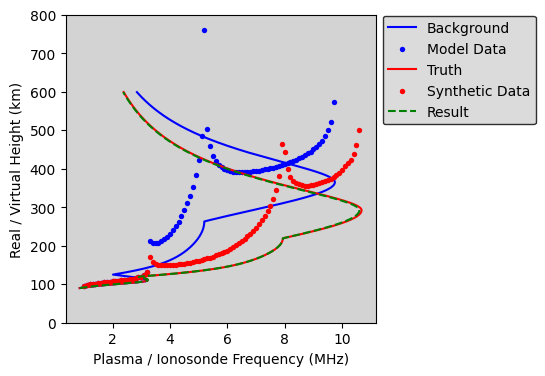

In [2]:
# Plot the results.
# The electron density profile (EDP) is converted from plasma density to plasma
# frequency and plotted using real altitude on the y-axis.
# Virtual heights for O-mode are plotted with ionosonde frequency on
# the x-axis and virtual height on the y-axis.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
ax.set_ylim([0, 800])
ax.set_facecolor('lightgray')
ax.set_ylabel('Real / Virtual Height (km)')
ax.set_xlabel('Plasma / Ionosonde Frequency (MHz)')
ax.plot(PyRayHF.library.den2freq(input_example['den']) / 1e6, 
        input_example['alt'], c='blue', label='Background', zorder=1)
ax.scatter(input_example['freq'], vh_back, c='blue', label='Model Data',
           zorder=1, linewidth=0, s=15)
ax.plot(PyRayHF.library.den2freq(EDP_truth) / 1e6, 
        input_example['alt'], c='red', label='Truth', zorder=2)
ax.scatter(input_example['freq'], vh_data, c='red', label='Synthetic Data',
           zorder=2, linewidth=0, s=15)
ax.plot(PyRayHF.library.den2freq(EDP_result) / 1e6, 
        input_example['alt'], '--', c='green', label='Result', zorder=3)
leg = plt.legend(bbox_to_anchor=(1.0, 1.02), facecolor='lightgray', frameon=True)
leg.get_frame().set_edgecolor('black')


In [14]:
freq = np.array([3.0, 4.0, 5.0])
alt = np.array([100, 200, 300])
den = np.array([1e11, 5e11, 1e12])
bmag = np.array([5e-5, 5e-5, 5e-5])
bpsi = np.array([60.0, 60.0, 60.0])

vh_O, EDP = PyRayHF.library.model_VH(input_example['F2'], input_example['F1'], input_example['E'], freq, alt, bmag, bpsi)

res = PyRayHF.library.residual_VH(params, F2_init, F1_init, E_init, f_in, vh_obs, alt, b_mag, b_psi)

[198.1695621  247.07192693 261.65938426] [5.39526841e+10 2.81042886e+11 6.66833261e+11]
